# **Modelo predictivo de satisfacción en proyecto solidario**

Ángel Azahel Ramírez Cabello - A01383328

Annete Pamela Ruiz Abreu - A01423595

Luis Angel López Chávez - A01571000

Jorge Raúl Rocha López - A01740816

Franco Mendoza Muraira - A01383399

Datasets: https://drive.google.com/file/d/1pP523QcG0W4gHYq1NbNTZWVjW3xRdHwC/view?usp=sharing

# Etapa 2: Comprensión y Preparación de los datos

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import datetime
import seaborn as sns 
import geopandas as gpd

In [8]:
# Lectura de archivos
d1 = pd.read_excel("Datos/Encuesta+a+Estudiantes+PS_17+de+mayo+de+2023_12.05.xlsx", header=1)
d2 = pd.read_excel("Datos/Estudiantes+PS_INV23+TEC21_17+de+mayo+de+2023_12.22.xlsx", header=1)
d3 = pd.read_excel("Datos/Estudiantes+PS+AD22+TEC21_17+de+mayo+de+2023_12.07.xlsx", header=1)
d4 = pd.read_excel("Datos/Estudiantes+PS+FJ22+TEC21_17+de+mayo+de+2023_12.17.xlsx", header=1)
d5 = pd.read_excel("Datos/Estudiantes+PS+FJ23_17+de+mayo+de+2023_12.28.xlsx", header=1)

## Unión de datos

In [9]:
# Unir datos
raw_data = pd.concat([d1,d2,d3,d4,d5], ignore_index = True)

# Comprobación de la unión
print(len(d1)+len(d2)+len(d3)+len(d4)+len(d5)==len(raw_data))


True


In [10]:
raw_data.shape

(10499, 43)

In [4]:
raw_data.columns

Index(['Fecha de inicio', 'Fecha final', 'Tipo de respuesta', 'Dirección IP',
       'Progreso', 'Duración (en segundos)', 'Finalizado', 'Fecha registrada',
       'ID de respuesta', 'Apellido del destinatario', 'ID',
       'Datos de referencia externos', 'Latitud de ubicación',
       'Longitud de ubicación', 'Canal de la distribución',
       'Idioma del usuario',
       '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.',
       '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.',
       '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables',
       '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto',
       '1. Evalúa tu nivel satisfa

## Reformato de Datos

In [5]:
new_columns = ["Fecha de inicio", "Fecha final", "Tipo respuesta",
               "IP", "Progreso", "Duración", "Finalizado", "Fecha registrada",
               "ID respuesta", "Apellido", "ID", "Datos referencia externos", 
               "Latitud", "Longitud", "Canal de distribución", "Idioma",
               "P1.1", "P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P1.8", "P2", "P3",
               "Comentario para OSF", "P5.1", "P5.2", "P5.3", "P5.4",
               "Comentario general", "Tipo comentario", "OSF", "CRN", 
               "Nombre destinatario", "Correo", "OSF y nombre proyecto", "Nombre experiencia", 
               "Periodo", "Formato", "Matrícula", "Semana"]

rename_columns = {old : new for old, new in zip(raw_data.columns, new_columns)}

raw_data = raw_data.rename(columns = rename_columns) 

raw_data

,Fecha de inicio,Fecha final,Tipo respuesta,IP,Progreso,Duración,Finalizado,Fecha registrada,ID respuesta,Apellido,...,OSF,CRN,Nombre destinatario,Correo,OSF y nombre proyecto,Nombre experiencia,Periodo,Formato,Matrícula,Semana
0,2021-04-22 13:24:25,2021-04-22 13:26:37,Survey Preview,NaN,100,132,True,2021-04-22 13:26:38.693,R_12tdDn1LDz4BmzD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-22 17:35:09,2021-04-22 17:38:36,IP Address,187.153.66.173,100,207,True,2021-04-22 17:38:37.820,R_3nBhoMQcs4l6UzN,NaN,...,León Ortigosa ABP,26892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-22 18:31:39,2021-04-22 18:34:28,IP Address,187.189.141.187,100,168,True,2021-04-22 18:34:29.065,R_3CT33YuqT2viJVr,NaN,...,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-23 04:47:59,2021-04-23 04:53:49,IP Address,45.238.188.41,100,349,True,2021-04-23 04:53:50.721,R_2Vr6CJ6upwFerdf,NaN,...,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-23 07:45:14,2021-04-23 07:49:20,IP Address,189.152.158.35,100,245,True,2021-04-23 07:49:20.607,R_cTjIZnPkeIWYVUZ,NaN,...,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,2023-05-05 19:27:32,2023-05-05 19:33:53,IP Address,201.172.224.145,100,380,True,2023-05-05 19:33:54.699,R_3NXxtUgVCKhsVbN,NaN,...,NaN,NaN,NaN,NaN,"Tierra de Artistas, A.C.",NaN,NaN,NaN,NaN,NaN
10495,2023-05-05 20:30:55,2023-05-05 20:40:27,IP Address,189.219.40.197,100,572,True,2023-05-05 20:40:29.092,R_3KxON95fcLNEP97,NaN,...,NaN,NaN,NaN,NaN,Community First (Campus Cumbres),NaN,NaN,NaN,NaN,NaN
10496,2023-05-08 13:58:27,2023-05-08 14:03:32,IP Address,189.219.41.21,100,305,True,2023-05-08 14:03:34.453,R_24CYlJq6Rm409Z1,NaN,...,NaN,NaN,NaN,NaN,Secretaría de Educación de Nuevo León: Coordin...,NaN,NaN,NaN,NaN,NaN
10497,2023-05-08 18:35:40,2023-05-08 18:38:06,IP Address,189.159.96.60,100,145,True,2023-05-08 18:38:07.220,R_1eJN81eTg5dEtfc,NaN,...,NaN,NaN,NaN,NaN,FUERZA Y ESPERANZA POR UNO MÁS,NaN,NaN,NaN,NaN,NaN


In [6]:
to_numbers = {"\n5 Totalmente de Acuerdo": 5,
              "\n5 Muy Satisfecho": 5,
              " 4": 4,
              " 3": 3,
              " 2": 2,
              "\n1 Nada Satisfecho": 1,
              "\n1 Nada de Acuerdo": 1}

for col in raw_data.columns:
    raw_data[col] = raw_data[col].replace(to_numbers)

raw_data.dtypes

Fecha de inicio              datetime64[ns]
Fecha final                  datetime64[ns]
Tipo respuesta                       object
IP                                   object
Progreso                              int64
Duración                              int64
Finalizado                             bool
Fecha registrada             datetime64[ns]
ID respuesta                         object
Apellido                             object
ID                                   object
Datos referencia externos           float64
Latitud                             float64
Longitud                            float64
Canal de distribución                object
Idioma                               object
P1.1                                float64
P1.2                                float64
P1.3                                float64
P1.4                                float64
P1.5                                float64
P1.6                                float64
P1.7                            

##  Visualización de Datos

### Variables Cuantitativas

In [ ]:
# !pip install geopandas
import geopandas as gpd


<!-- La columna OSF se refiere a un identificador de la Organización Socio-Formador por lo que se considera una variable categórica -->

Las siguientes columnas son _completamente nulas_ :

- **Datos referencia externos**
- **Nombre destinatario**
- **Correo**

Las columnas de preguntas: P2, P3 son respuestas de Sí y No, por lo que son variables categóricas 

In [ ]:
cols_nulos = [col for col in raw_data.columns if raw_data[col].isna().sum() == raw_data.shape[0]]
cols_nulos

['Datos referencia externos', 'Nombre destinatario', 'Correo']

In [ ]:
numericVariables = raw_data.select_dtypes(["int64", "float64"]).drop(cols_nulos, axis = 1)
print(numericVariables.columns)
numericVariables

Index(['Progreso', 'Duración', 'Latitud', 'Longitud', 'P1.1', 'P1.2', 'P1.3',
       'P1.4', 'P1.5', 'P1.6', 'P1.7', 'P1.8', 'P5.1', 'P5.2', 'P5.3', 'P5.4',
       'CRN', 'Periodo'],
      dtype='object')


,Progreso,Duración,Latitud,Longitud,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4,CRN,Periodo
0,100,132,25.644897,-100.310997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,207,22.333099,-97.884300,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,26892.0,NaN
2,100,168,25.747894,-100.284401,4.0,4.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,26918.0,NaN
3,100,349,20.815598,-102.766998,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,26913.0,NaN
4,100,245,25.682205,-100.262199,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,26933.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,100,380,25.655400,-100.325800,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
10495,100,572,25.654600,-100.296700,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
10496,100,305,25.654600,-100.296700,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN
10497,100,145,25.654400,-100.405600,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN


In [ ]:
col_cat = [col for col in raw_data.columns if col not in numericVariables]
col_cat

['Fecha de inicio',
 'Fecha final',
 'Tipo respuesta',
 'IP',
 'Finalizado',
 'Fecha registrada',
 'ID respuesta',
 'Apellido',
 'ID',
 'Datos referencia externos',
 'Canal de distribución',
 'Idioma',
 'P2',
 'P3',
 'Comentario para OSF',
 'Comentario general',
 'Tipo comentario',
 'OSF',
 'Nombre destinatario',
 'Correo',
 'OSF y nombre proyecto',
 'Nombre experiencia',
 'Formato',
 'Matrícula',
 'Semana']

In [ ]:
progresoValues = pd.DataFrame(numericVariables["Progreso"].value_counts())
progresoValues

,Progreso
100,10495
88,4


Se encuentra que de los 10495 registros de encueestas, únicamente 4 no se contestaron completamente, llegando hasta 88% de completición

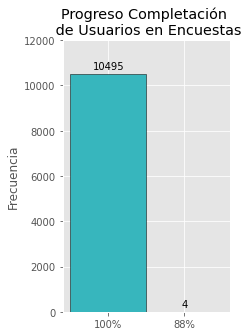

In [ ]:
progresoValues = pd.DataFrame(numericVariables["Progreso"].value_counts())

fig = plt.figure(figsize = (3, 5))

barProgreso = plt.bar([0,0.5], progresoValues["Progreso"], color ='#37b6bd',
                      width = 0.5, align = "center", ec = "black")

plt.ylim([0,12000])
progresoLocs, progresoLabels = plt.xticks([0, 0.5], labels = progresoValues.index.astype(str) + "%")

for i, bar in enumerate(barProgreso):
    plt.text(x = bar.get_x() + bar.get_width() / 2.0, y = bar.get_height() + 200, s = f"{bar.get_height()}", ha = "center")

plt.title("Progreso Completación \n de Usuarios en Encuestas")
plt.ylabel("Frecuencia")

plt.show()

Cuartiles de variable de "Duración" en segundos

- 0%   : 25
- 25%  : 119
- 50%  : 190
- 75%  : 361
- 100% : 1298823

In [ ]:
numericVariables['Duración'].quantile([0,0.25, 0.5, 0.75,1])

0.00         25.0
0.25        119.0
0.50        190.0
0.75        361.0
1.00    1298823.0
Name: Duración, dtype: float64

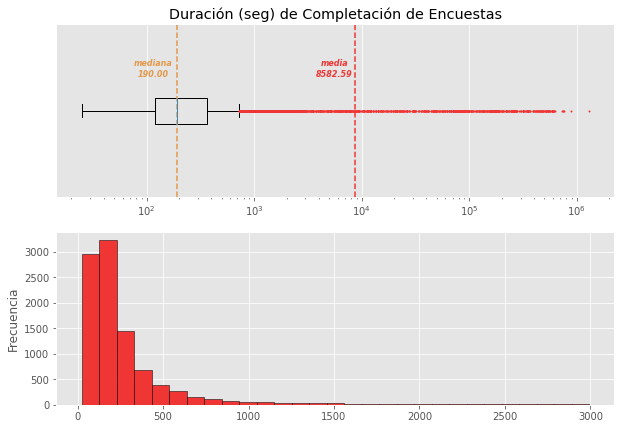

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,7))

filteredDuracion = numericVariables[numericVariables["Duración"] <= 3000]

results = ax1.boxplot(numericVariables["Duración"], vert = False,
                      flierprops={'marker': 'o', 
                                  'markersize': 1,
                                  'markerfacecolor' : '#f03535', 
                                  'markeredgecolor' : '#f03535'})

ax1.set_title("Duración (seg) de Completación de Encuestas")
ax1.set_xscale("log")
ax1.get_yaxis().set_visible(False)
ax1.axvline(numericVariables["Duración"].median(), color = "#e3994b", ls='--')
ax1.axvline(numericVariables["Duración"].mean(), color = "#f03535", ls='--')

ax1.text(x = numericVariables["Duración"].median() - 75, y = 1 + 0.20, 
         s = f"mediana\n{numericVariables['Duración'].median():.2f}", 
         ha = "center", fontsize = 8, fontstyle = "oblique", fontweight = "bold",
         color = "#e3994b")

ax1.text(x = numericVariables["Duración"].mean() - 3000, y = 1 + 0.20, 
         s = f"media\n{numericVariables['Duración'].mean():.2f}", 
         ha = "center", fontsize = 8, fontstyle = "oblique", fontweight = "bold",
         color = "#f03535") 

ax2.hist(filteredDuracion["Duración"],  
         bins = np.linspace(filteredDuracion["Duración"].min(),
                            filteredDuracion["Duración"].max(),
                            30),
         color = "#f03535",
         ec = "black")
ax2.set_ylabel("Frecuencia")

plt.show()

**¿Se quiere realizar un análisis para encontrar de cuales países provienen los resultados de la encuesta?**

In [ ]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

C:\Users\angel\AppData\Local\Temp/ipykernel_29016/3095724689.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


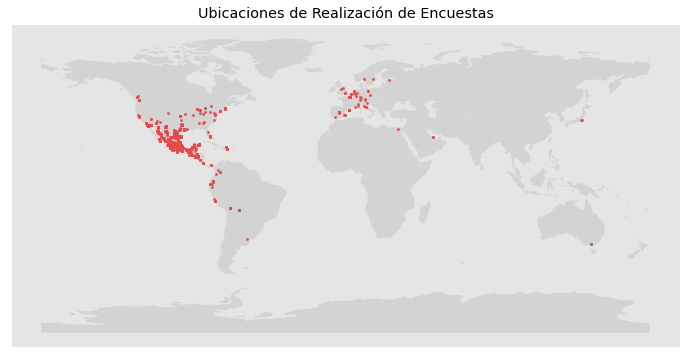

In [ ]:
geometry = [Point(xy) for xy in zip(numericVariables['Longitud'], numericVariables['Latitud'])]
gdf = GeoDataFrame(numericVariables, geometry = geometry)

fig, axMap = plt.subplots(figsize=(12, 6))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax = axMap,color = 'lightgray', markersize = 5)

plt.scatter(numericVariables['Longitud'], numericVariables['Latitud'], color = '#e34b4b', s=5)

axMap.get_xaxis().set_visible(False)
axMap.get_yaxis().set_visible(False)

axMap.set_title("Ubicaciones de Realización de Encuestas")

plt.show()

In [ ]:
import seaborn as sns

In [ ]:
questions = numericVariables[['P1.1', 'P1.2', 'P1.3', 'P1.4', 'P1.5',
                              'P1.6', 'P1.7', 'P1.8', 'P5.1', 'P5.2', 
                              'P5.3', 'P5.4']]

questions.corr()

,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4
P1.1,1.000000,0.769652,0.707533,0.689604,0.514595,0.761451,0.721158,0.626563,0.464929,0.527476,0.482508,0.511512
P1.2,0.769652,1.000000,0.710194,0.658420,0.530129,0.692055,0.656294,0.610161,0.513366,0.574809,0.523962,0.555859
P1.3,0.707533,0.710194,1.000000,0.656092,0.501959,0.659959,0.639671,0.573503,0.464120,0.535832,0.485031,0.527644
P1.4,0.689604,0.658420,0.656092,1.000000,0.496143,0.696515,0.668409,0.573875,0.454455,0.498975,0.465372,0.472441
P1.5,0.514595,0.530129,0.501959,0.496143,1.000000,0.507758,0.497206,0.558853,0.387165,0.402761,0.373331,0.391169
P1.6,0.761451,0.692055,0.659959,0.696515,0.507758,1.000000,0.837625,0.662978,0.437274,0.502690,0.457573,0.492415
P1.7,0.721158,0.656294,0.639671,0.668409,0.497206,0.837625,1.000000,0.682255,0.424102,0.489432,0.443559,0.471943
P1.8,0.626563,0.610161,0.573503,0.573875,0.558853,0.662978,0.682255,1.000000,0.406643,0.461918,0.409183,0.439532
P5.1,0.464929,0.513366,0.464120,0.454455,0.387165,0.437274,0.424102,0.406643,1.000000,0.666425,0.638510,0.630717
P5.2,0.527476,0.574809,0.535832,0.498975,0.402761,0.502690,0.489432,0.461918,0.666425,1.000000,0.730925,0.741025


In [ ]:
questions.describe().drop("count").round(2)

,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4
mean,4.53,4.59,4.56,4.49,4.30,4.49,4.47,4.46,4.6,4.72,4.72,4.71
std,0.74,0.70,0.72,0.84,0.95,0.84,0.87,0.84,0.7,0.57,0.58,0.59
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
25%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.0,5.00,5.00,5.00
50%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00
75%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00


In [ ]:
other = numericVariables[['Progreso', 'Duración', 'Latitud', 'Longitud']]
other.describe().round(2).rename({"Duración" : "Duración (en seg)"}, axis = True)

,Progreso,Duración (en seg),Latitud,Longitud
count,10499.00,10499.00,10495.00,10495.00
mean,100.00,8582.59,25.00,-99.21
std,0.23,52148.45,4.07,10.76
min,88.00,25.00,-37.83,-123.13
25%,100.00,119.00,25.64,-100.33
50%,100.00,190.00,25.65,-100.31
75%,100.00,361.00,25.68,-100.26
max,100.00,1298823.00,59.96,144.97


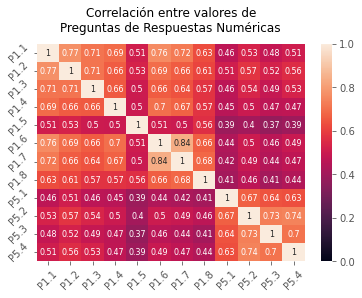

In [ ]:
corr = sns.heatmap(questions.corr(), annot=True, vmin=0, vmax=1, annot_kws={"fontsize":8})
corr.set_title('Correlación entre valores de\nPreguntas de Respuestas Numéricas', fontdict={'fontsize':12}, pad=12);
corr.tick_params(axis='y', rotation=45)
corr.tick_params(axis='x', rotation=45)

In [ ]:
numericVariables.columns

Index(['Progreso', 'Duración', 'Latitud', 'Longitud', 'P1.1', 'P1.2', 'P1.3',
       'P1.4', 'P1.5', 'P1.6', 'P1.7', 'P1.8', 'P5.1', 'P5.2', 'P5.3', 'P5.4',
       'CRN', 'Periodo'],
      dtype='object')

## Manejar valores nulos

In [ ]:
raw_data.loc[questions.apply(lambda row: True if row.isna().sum() > 0 else False, axis = 1)]

,Fecha de inicio,Fecha final,Tipo respuesta,IP,Progreso,Duración,Finalizado,Fecha registrada,ID respuesta,Apellido,...,OSF,CRN,Nombre destinatario,Correo,OSF y nombre proyecto,Nombre experiencia,Periodo,Formato,Matrícula,Semana
0,2021-04-22 13:24:25,2021-04-22 13:26:37,Survey Preview,NaN,100,132,True,2021-04-22 13:26:38.693,R_12tdDn1LDz4BmzD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,2021-06-03 23:27:01,2021-06-03 23:27:30,Survey Preview,NaN,100,28,True,2021-06-03 23:27:31.144,R_1jTe0ddq06uaF2u,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_data.isna().sum()

Fecha de inicio                  0
Fecha final                      0
Tipo respuesta                   0
IP                               3
Progreso                         0
Duración                         0
Finalizado                       0
Fecha registrada                 0
ID respuesta                     0
Apellido                      7283
ID                               0
Datos referencia externos    10499
Latitud                          4
Longitud                         4
Canal de distribución         1520
Idioma                           0
P1.1                             2
P1.2                             2
P1.3                             2
P1.4                             2
P1.5                             2
P1.6                             2
P1.7                             2
P1.8                             2
P2                               2
P3                               2
Comentario para OSF            161
P5.1                             2
P5.2                

## Comprensión

In [ ]:
# Exploración
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha de inicio            10499 non-null  datetime64[ns]
 1   Fecha final                10499 non-null  datetime64[ns]
 2   Tipo respuesta             10499 non-null  object        
 3   IP                         10496 non-null  object        
 4   Progreso                   10499 non-null  int64         
 5   Duración                   10499 non-null  int64         
 6   Finalizado                 10499 non-null  bool          
 7   Fecha registrada           10499 non-null  datetime64[ns]
 8   ID respuesta               10499 non-null  object        
 9   Apellido                   3216 non-null   object        
 10  ID                         10499 non-null  object        
 11  Datos referencia externos  0 non-null      float64       
 12  Lati

# Reinicio de raw data


In [ ]:
raw_data = pd.concat([d1,d2,d3,d4,d5])

In [ ]:
# Estadística variables cuantitativas

cuantitativas = raw_data.drop(labels=["Datos de referencia externos", "Nombre del destinatario", "Correo electrónico del destinatario", "CRN", "Periodo"], axis=1)
cuantitativas.describe()


,Progreso,Duración (en segundos),Latitud de ubicación,Longitud de ubicación
count,10499.000000,1.049900e+04,10495.000000,10495.000000
mean,99.995428,8.582590e+03,24.995108,-99.212264
std,0.234194,5.214845e+04,4.066914,10.763758
min,88.000000,2.500000e+01,-37.828000,-123.133700
25%,100.000000,1.190000e+02,25.644897,-100.325800
50%,100.000000,1.900000e+02,25.654600,-100.311000
75%,100.000000,3.610000e+02,25.680200,-100.263100
max,100.000000,1.298823e+06,59.955000,144.966900


In [ ]:
# Moda de variables
o = pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).index
l = ["Fecha de inicio", "Fecha final","Tipo respuesta", "IP","Progreso","Duración","Finalizado","Fecha registrada","ID respuesta","Apellido","ID","Datos referencia externos","Latitud", "Longitud", "Canal de distribución", "Idioma","P1.1","P1.2","P1.3","P1.4","P1.5","P1.6","P1.7","P1.8","P2","P3","Comentario para BB","P5.1","P5.2","P5.3","P5.4","Comentario general","Tipo comentario","NomOSF_Experiencia","OSF","CRN", "Nombre destinatario", "Correo", "OSF y nombre proyecto", "Nombre experiencia", "Periodo", "Formato", "Matrícula", "Semana"]
pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).rename(index=dict(zip(o,l)))



,mode
Fecha de inicio,2021-05-29 10:19:02
Fecha final,2022-11-28 21:45:52
Tipo respuesta,IP Address
IP,131.178.200.61
Progreso,100
Duración,104
Finalizado,True
Fecha registrada,2021-04-22 13:26:38.693000
ID respuesta,R_12tdDn1LDz4BmzD
Apellido,NaN


In [ ]:
pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).rename(index=dict(zip(o,l))).shape

(43, 1)

# Aqui van los dataframes de Jorge

In [ ]:
# Tablas de frecuencia de variables categóricas
cualitativas = raw_data.drop(labels=["Datos de referencia externos","Fecha de inicio", "Fecha final", "Dirección IP", "Duración (en segundos)", "Fecha registrada", "ID de respuesta", "Apellido del destinatario", "ID", "Latitud de ubicación", "Longitud de ubicación", "CRN", "Matrícula con A0XXXXXXX:", "Nombre del destinatario", "Correo electrónico del destinatario"], axis=1)
for i in cualitativas:
    print(pd.DataFrame(raw_data[i].value_counts()))
    print()


                Tipo de respuesta
IP Address                  10491
Spam                            5
Survey Preview                  3

     Progreso
100     10495
88          4

       Finalizado
True        10495
False           4

           Canal de la distribución
anonymous                      5056
email                          3856
gl                               64
preview                           3

       Idioma del usuario
ES-ES               10499

                     1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.
\n5 Muy Satisfecho                                                6787                                                    
 4                                                                2797                                                    
 3                                                                 712                                                    
 2                                     

In [ ]:
dic_valores_nu = {}
dic_tipos_datos= {} 
dic_valores_dif = {}
dic_valores_pos = {}
lista_tipos = raw_data.dtypes

contador=0
columnas = raw_data.columns

for u in columnas:
    dic_valores_nu[u]= raw_data[u].isnull().sum()
    dic_valores_dif[u] = raw_data[u].nunique()
    
    if(dic_valores_dif[u] <= 5):
        dic_valores_pos[u] = raw_data[u].unique()
    elif(dic_valores_dif[u] > 5):
        dic_valores_pos[u] = raw_data[u].unique()
        
    if(lista_tipos[contador]=='object'):
        dic_tipos_datos[u] = 'categórico'
    elif(lista_tipos[contador]=='datetime64[ns]'):
        dic_tipos_datos[u] = 'numérico (time-stamp)'
    elif(lista_tipos[contador] in ['int64','float64']):
        dic_tipos_datos[u] = 'numérico'
    contador+=1


# Modificiamos manualmente algunas de los valores del diccionario tipos_datos porque algunos estaban mal:
dic_tipos_datos['Periodo']='categórico'
dic_tipos_datos['Correo electrónico del destinatario']='categórico (NA)'
dic_tipos_datos['Finalizado'] = 'categórico'
dic_tipos_datos['Nombre del destinatario'] = 'categórico (NA)'
dic_tipos_datos['Datos de referencia externos'] = 'categórico (NA)'
dic_tipos_datos['CRN'] = 'categórico '



# Modificamos manualmente algunos de los valores del diccionario valores_pos
dic_valores_pos['Fecha de inicio'] = (raw_data['Fecha de inicio'].min(),'-', (raw_data['Fecha de inicio']).max())
dic_valores_pos['Fecha final'] = (raw_data['Fecha final'].min(),'-', raw_data['Fecha final'].max())
dic_valores_pos['Fecha registrada'] = (raw_data['Fecha registrada'].min(),'-', raw_data['Fecha registrada'].max())

d21 = pd.DataFrame([dic_tipos_datos,dic_valores_dif, dic_valores_pos, (dic_valores_nu)])
d21 = d21.T
nuevas_col = ['Tipo de datos', 'Número de valores dif','Valores posibles', 'Número de nan']
d21.columns = nuevas_col
d21



,Tipo de datos,Número de valores dif,Valores posibles,Número de nan
Fecha de inicio,numérico (time-stamp),10429,"(2021-04-22 13:24:25, -, 2023-05-13 01:06:15)",0
Fecha final,numérico (time-stamp),10443,"(2021-04-22 13:26:37, -, 2023-05-13 01:08:28)",0
Tipo de respuesta,categórico,3,"[Survey Preview, IP Address, Spam]",0
Dirección IP,categórico,7896,"[nan, 187.153.66.173, 187.189.141.187, 45.238....",3
Progreso,numérico,2,"[100, 88]",0
Duración (en segundos),numérico,1914,"[132, 207, 168, 349, 245, 151, 280, 246, 515, ...",0
Fecha registrada,numérico (time-stamp),10499,"(2021-04-22 13:26:38.693000, -, 2023-05-13 01:...",0
ID de respuesta,categórico,10499,"[R_12tdDn1LDz4BmzD, R_3nBhoMQcs4l6UzN, R_3CT33...",0
Apellido del destinatario,categórico,2599,"[nan, Nava Villa, Toca Balderas, Deándar Coind...",7283
ID,categórico,4436,"[@00001, @00002, @00003, @00004, @00005, @0000...",0


c) Exploración de datos:

1) Calcula medidas estadísticas 

     Variables cuantitativas

- Medidas de tendencia central:promedio, media, mediana y moda de los datos.
- Medidas de dispersión: rango: máximo - mínimo, varianza, desviación estándar.


In [ ]:
dic_medidas_estadisticas_media = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0 }
dic_medidas_estadisticas_mediana = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0 }
dic_medidas_estadisticas_moda = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0 }
dic_medidas_dispersion_min={'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0}
dic_medidas_dispersion_max = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0}
dic_medidas_dispersion_varianza = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0}
dic_medidas_dispersion_desv = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0}


for u in dic_medidas_estadisticas_media:
    dic_medidas_estadisticas_media[u] = raw_data[u].mean()
    dic_medidas_estadisticas_mediana[u] = raw_data[u].median()
    dic_medidas_estadisticas_moda[u] = (raw_data[u].sum() / len(raw_data))
    dic_medidas_dispersion_min[u] = raw_data[u].min()
    dic_medidas_dispersion_max[u] = raw_data[u].max()
    dic_medidas_dispersion_varianza[u] = raw_data[u].var()
    dic_medidas_dispersion_desv[u] = raw_data[u].std()

    
d22 = pd.DataFrame([dic_medidas_estadisticas_media,dic_medidas_estadisticas_mediana,dic_medidas_estadisticas_moda,dic_medidas_dispersion_min,dic_medidas_dispersion_max,dic_medidas_dispersion_varianza,dic_medidas_dispersion_desv])
d22 = d22.T
nuevas_col = ['Media','Mediana', 'Moda', 'Valor mínimo', 'Valor máximo', 'Varianza', 'Desviación estándar']
d22.columns = nuevas_col
d22

,Media,Mediana,Moda,Valor mínimo,Valor máximo,Varianza,Desviación estándar
Progreso,99.995428,100.0000,99.995428,88.0000,1.000000e+02,5.484669e-02,0.234194
Duración (en segundos),8582.589580,190.0000,8582.589580,25.0000,1.298823e+06,2.719461e+09,52148.449590
Latitud de ubicación,24.995108,25.6546,24.985586,-37.8280,5.995500e+01,1.653979e+01,4.066914
Longitud de ubicación,-99.212264,-100.3110,-99.174465,-123.1337,1.449669e+02,1.158585e+02,10.763758


Variables cualitativas

- Tabla de distribución de frecuencia
- Moda

In [ ]:
dic_categorico={'Tipo de respuesta':0, 
                'Progreso':0, 
                'Canal de la distribución':0,
                'Idioma del usuario':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)':0,
                '2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?':0,
                '3. ¿Consideras interesante la causa social del socio formador?':0,
                '4. Escribe algún comentario que te interese compartir con la organización socio formadora:':0,
                '5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad':0,
                '5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes':0,
                '5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos':0,
                '5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia':0,
                '6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:':0,
                '6.1 Tu comentario sobre la experiencia es:':0,
                'OSF':0,
                'Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:':0,
                'Nombre de Experiencia':0,
                'Periodo':0,
                'Semana':0,
                'Tipo de Formato':0,
                'Finalizado':0
               }


dic_frecuencia = {}
dic_modas = {}

for u in dic_categorico:
    dic_categorico[u] = raw_data[u].value_counts()
    dic_frecuencia[u] = pd.DataFrame(dic_categorico[u])
    dic_modas[u] = dic_frecuencia[u].index[0]
    

## Tablas de frecuencia

In [ ]:
# Tabla de frecuencia de Tipo de respuesta
dic_frecuencia['Tipo de respuesta']

,Tipo de respuesta
IP Address,10491
Spam,5
Survey Preview,3


In [ ]:
# Tabla de frecuencia de tipo de Progreso
dic_frecuencia['Progreso']

,Progreso
100,10495
88,4


In [ ]:
# Tabla de frecuencia de tipo de Canal de la distribución
dic_frecuencia['Canal de la distribución']

,Canal de la distribución
anonymous,5056
email,3856
gl,64
preview,3


In [ ]:
# Tabla de frecuencia de tipo de Idioma del usuario
dic_frecuencia['Idioma del usuario']

,Idioma del usuario
ES-ES,10499


In [ ]:
# Tabla de frecuencia de tipo de la primera pregunta 1 - a)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.'].head()

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.
\n5 Muy Satisfecho,6787
4,2797
3,712
2,119
\n1 Nada Satisfecho,82


In [ ]:
# Tabla de frecuencia de la segunda pregunta 1- b)
dic_frecuencia[ '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.'].head()

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.
\n5 Muy Satisfecho,7131
4,2652
3,540
2,106
\n1 Nada Satisfecho,68


In [ ]:
# Tabla de frecuencia de la segunda pregunta 1- c)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables'].head()

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables
\n5 Muy Satisfecho,6982
4,2689
3,632
2,122
\n1 Nada Satisfecho,72


In [ ]:
# Tabla de frecuencia de la tercera pregunta 1 - e)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto'].head()

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto
\n5 Muy Satisfecho,6855
4,2409
3,875
2,224
\n1 Nada Satisfecho,134


In [ ]:
# Tabla de frecuencia de la cuarta pregunta 1 - f)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.'].head()

,"1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f) Herramientas que aplicaste como las actividades, reportes, ""quizzes"", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social."
\n5 Muy Satisfecho,5805
4,2848
3,1295
2,335
\n1 Nada Satisfecho,214


In [ ]:
# Tabla de frecuencia de la quinta pregunta 1 - g)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora']

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora
\n5 Muy Satisfecho,6899
4,2400
3,801
2,259
\n1 Nada Satisfecho,138


In [ ]:
# Tabla de la sexta pregunta 1 - h) 
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora']

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora
\n5 Muy Satisfecho,6836
4,2404
3,822
2,264
\n1 Nada Satisfecho,171


In [ ]:
# Tabla de frecuencia de la séptima pregunta 1 - i)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)']

,"1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)"
\n5 Muy Satisfecho,6624
4,2566
3,963
2,208
\n1 Nada Satisfecho,136


In [ ]:
# Tabla de frecuencia de la pregunta 2.0 
dic_frecuencia['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?']

,2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?
Sí,8874
No,1623


In [ ]:
# Tabla de frecuencia de la pregunta 3. 
dic_frecuencia['3. ¿Consideras interesante la causa social del socio formador?']

,3. ¿Consideras interesante la causa social del socio formador?
Sí,10340
No,157


In [ ]:
# Tabla de frecuencia de la pregunta 4.
dic_frecuencia['4. Escribe algún comentario que te interese compartir con la organización socio formadora:'].head()

,4. Escribe algún comentario que te interese compartir con la organización socio formadora:
.,272
-,95
Todo bien,49
Todo muy bien,27
:),26


In [ ]:
# Tabla de frecuencia de la pregunta 5.1
dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad']

,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad"
\n5 Totalmente de Acuerdo,7295
4,2445
3,593
\n1 Nada de Acuerdo,82
2,82


In [ ]:
# Tabla de frecuencia de la pregunta 5.2
dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes']

,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes"
\n5 Totalmente de Acuerdo,8002
4,2133
3,289
2,38
\n1 Nada de Acuerdo,35


In [ ]:
# Tabla de frecuencia de la pregunta 5.3
dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos']


,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos"
\n5 Totalmente de Acuerdo,8139
4,1936
3,338
2,47
\n1 Nada de Acuerdo,37


In [ ]:
# Tabla de frecuencia de la pregunta 5.4
dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia']


,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia"
\n5 Totalmente de Acuerdo,8051
4,2007
3,348
2,49
\n1 Nada de Acuerdo,42


In [ ]:
# Tabla de frecuencia de la pregunta 6.0
dic_frecuencia['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:'].head()


,6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:
.,235
-,77
Todo bien,41
:),25
Me gusto mucho,19


In [ ]:
# Tabla de frecuencia de la pregunta 6.1
dic_frecuencia['6.1 Tu comentario sobre la experiencia es:']


,6.1 Tu comentario sobre la experiencia es:
Reconocimiento,6799
Área de oportunidad,2265


In [ ]:
# Tabla de frecuencia de la columna OSF
dic_frecuencia['OSF'].head()

,OSF
Dirección de Servicio Social,621
Dirección de Servicio Social - Aprendizajes para todos,398
"SAIIS, Sociedad de Alumnos de Ingeniero Industrial y de Sistemas",183
"Be The Match MX, A.C.",119
Proyecto 99,118


In [ ]:
# Tabla de frecuencia de la columna nombre de la OSF y el proyecto 
dic_frecuencia['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:'].head()

,Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:
"Proeducación IAP, Jóvenes Ayudando a Niñas y Niños_Tutorías para defender a la Educación",168
Dirección de Servicio Social - Aprendizajes para todos_Aprendizajes para Todos: Tutor académico,152
"Tierra de Artistas, A.C.",134
INICIATIVA DE EDUCACIÓN CON EQUIDAD Y CALIDAD ---- Dirección de Servicio Social - Aprendizajes para Todos: Tutor académico,100
Fundacionplan.org - Plan SPAP A.C._Experiencia Plan,94


In [ ]:
# Tabla de frecuencia de la columna Nombre de la experiencia 
dic_frecuencia['Nombre de Experiencia'].head()

,Nombre de Experiencia
Aprendamos Juntos: Tutor Académico Matématicas,70
Tutorías para defender a la Educación,48
Un Paso Adelante,43
Niños Regios,43
Líder Solidario,40


In [ ]:
# Tabla de frecuencia de la columna Periodo
dic_frecuencia['Periodo']

,Periodo
3.0,1685
202211.0,94
44593.0,9
2.0,4


In [ ]:
# Tabla de frecuencia de la columna Semana 
dic_frecuencia['Semana']

,Semana
1-3,1625
2-3,53
2,50
1-2,44
3,7


In [ ]:
# Tabla de frecuencia de la columna Tipo de Formato
dic_frecuencia['Tipo de Formato']

,Tipo de Formato
Regular,1792


In [ ]:
# Tabla de frecuencia de la columna Finalizado
dic_frecuencia['Finalizado']

,Finalizado
True,10495
False,4


In [ ]:
d23 = pd.DataFrame([dic_modas])
d23 = d23.T
d23.columns = ['Moda']
d23

,Moda
Tipo de respuesta,IP Address
Progreso,100
Canal de la distribución,anonymous
Idioma del usuario,ES-ES
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.,\n5 Muy Satisfecho
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.,\n5 Muy Satisfecho
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables,\n5 Muy Satisfecho
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto,\n5 Muy Satisfecho
"1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f) Herramientas que aplicaste como las actividades, reportes, ""quizzes"", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.",\n5 Muy Satisfecho
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora,\n5 Muy Satisfecho


## 2) Explora los datos usando herramientas de visualización


Variables cuantitativas:
- Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots
- Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica
- Análisis de correlación  de los datos, mapa de color

In [ ]:
variables_cuantitativas = raw_data[['Progreso','Duración (en segundos)', 'Latitud de ubicación','Longitud de ubicación']]
# Medidas de posición no-central (cuartiles)
variables_cuantitativas.describe()

,Progreso,Duración (en segundos),Latitud de ubicación,Longitud de ubicación
count,10499.000000,1.049900e+04,10495.000000,10495.000000
mean,99.995428,8.582590e+03,24.995108,-99.212264
std,0.234194,5.214845e+04,4.066914,10.763758
min,88.000000,2.500000e+01,-37.828000,-123.133700
25%,100.000000,1.190000e+02,25.644897,-100.325800
50%,100.000000,1.900000e+02,25.654600,-100.311000
75%,100.000000,3.610000e+02,25.680200,-100.263100
max,100.000000,1.298823e+06,59.955000,144.966900


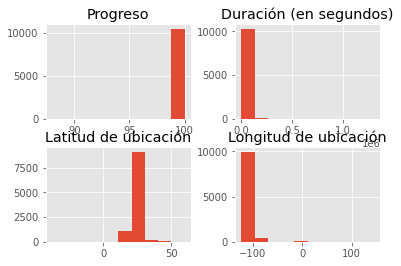

In [ ]:
# Distribución de las columnas: Histograma
plt.style.use('ggplot')
variables_cuantitativas.hist()
plt.show()


Variables categóricas
- Distribución de los datos (diagramas de barras, diagramas de pastel)

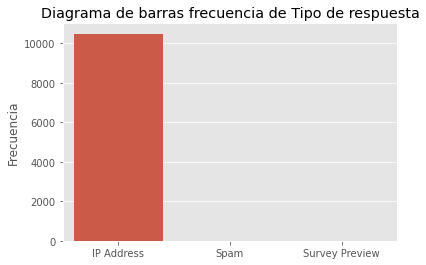

In [ ]:
sns.barplot(data=dic_frecuencia['Tipo de respuesta'], x=dic_frecuencia['Tipo de respuesta'].index, y =dic_frecuencia['Tipo de respuesta']['Tipo de respuesta'])
plt.title('Diagrama de barras frecuencia de Tipo de respuesta')
plt.ylabel('Frecuencia')
plt.show()

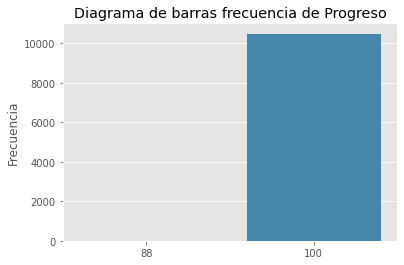

In [ ]:

sns.barplot(data=dic_frecuencia['Progreso'], x=dic_frecuencia['Progreso'].index, y =dic_frecuencia['Progreso']['Progreso'])
plt.title('Diagrama de barras frecuencia de Progreso')
plt.ylabel('Frecuencia')
plt.show()

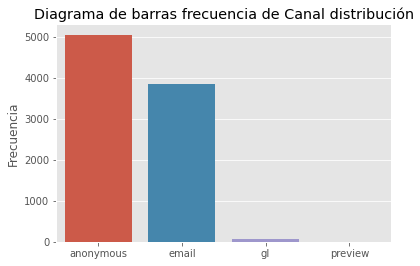

In [ ]:
sns.barplot(data=dic_frecuencia['Canal de la distribución'], x=dic_frecuencia['Canal de la distribución'].index, y =dic_frecuencia['Canal de la distribución']['Canal de la distribución'])
plt.title('Diagrama de barras frecuencia de Canal distribución')
plt.ylabel('Frecuencia')
plt.show()

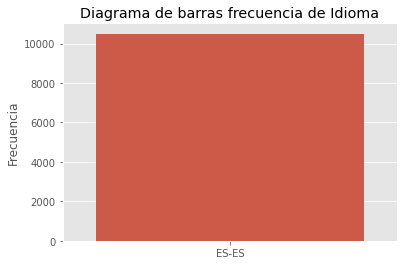

In [ ]:
sns.barplot(data=dic_frecuencia['Idioma del usuario'], x=dic_frecuencia['Idioma del usuario'].index, y =dic_frecuencia['Idioma del usuario']['Idioma del usuario'])
plt.title('Diagrama de barras frecuencia de Idioma')
plt.ylabel('Frecuencia')
plt.show()

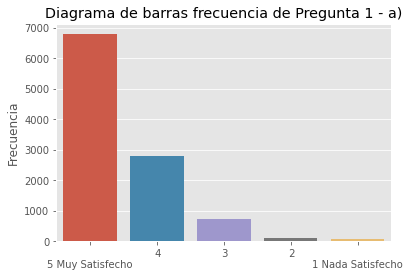

In [ ]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.'].index, y =dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.'])
plt.title('Diagrama de barras frecuencia de Pregunta 1 - a)')
plt.ylabel('Frecuencia')
plt.show()

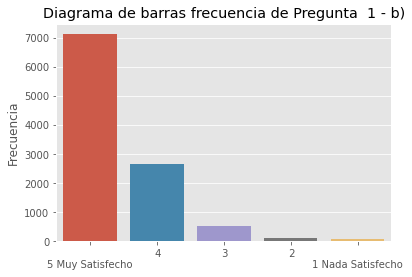

In [ ]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.'].index, y =dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.'])
plt.title('Diagrama de barras frecuencia de Pregunta  1 - b)')
plt.ylabel('Frecuencia')
plt.show()

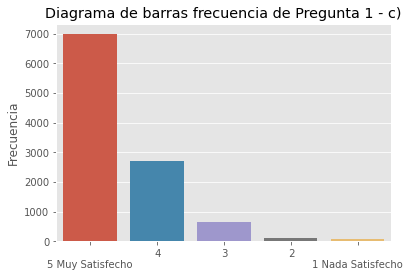

In [ ]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables'])
plt.title('Diagrama de barras frecuencia de Pregunta 1 - c)')
plt.ylabel('Frecuencia')
plt.show()

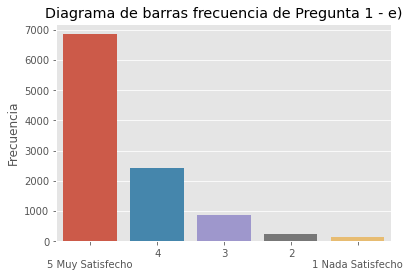

In [ ]:

sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto'])
plt.title('Diagrama de barras frecuencia de Pregunta 1 - e)')
plt.ylabel('Frecuencia')
plt.show()

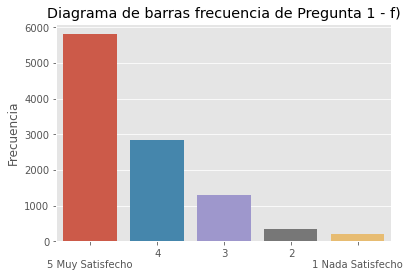

In [ ]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.'])
plt.title('Diagrama de barras frecuencia de Pregunta 1 - f)')
plt.ylabel('Frecuencia')
plt.show()


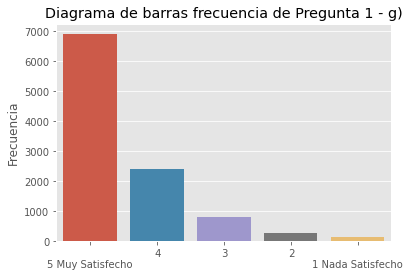

In [ ]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora'])
plt.title('Diagrama de barras frecuencia de Pregunta 1 - g)')
plt.ylabel('Frecuencia')
plt.show()

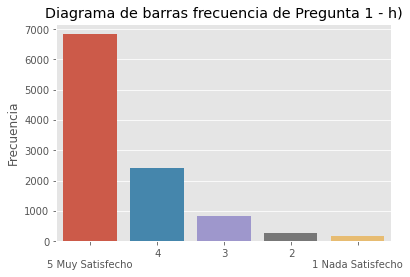

In [ ]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora'])
plt.title('Diagrama de barras frecuencia de Pregunta 1 - h)')
plt.ylabel('Frecuencia')
plt.show()

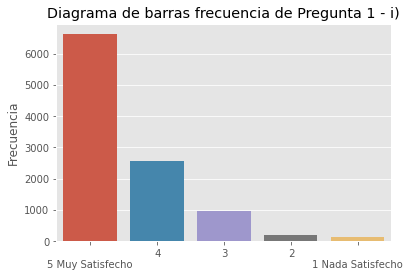

In [ ]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)'])
plt.title('Diagrama de barras frecuencia de Pregunta 1 - i)')
plt.ylabel('Frecuencia')
plt.show()

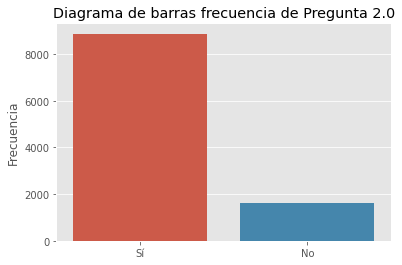

In [ ]:
sns.barplot(data=dic_frecuencia['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?'], x=dic_frecuencia['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?'].index, y=dic_frecuencia['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?']['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?'])
plt.title('Diagrama de barras frecuencia de Pregunta 2.0')
plt.ylabel('Frecuencia')
plt.show()

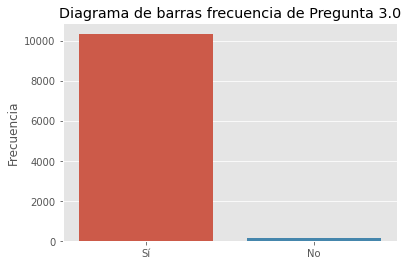

In [ ]:
sns.barplot(data=dic_frecuencia['3. ¿Consideras interesante la causa social del socio formador?'], x=dic_frecuencia['3. ¿Consideras interesante la causa social del socio formador?'].index, y=dic_frecuencia['3. ¿Consideras interesante la causa social del socio formador?']['3. ¿Consideras interesante la causa social del socio formador?'])
plt.title('Diagrama de barras frecuencia de Pregunta 3.0')
plt.ylabel('Frecuencia')
plt.show()

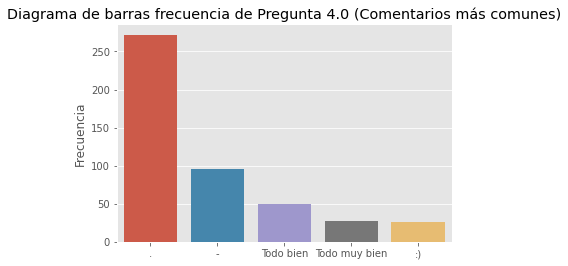

In [ ]:
sns.barplot(data=dic_frecuencia['4. Escribe algún comentario que te interese compartir con la organización socio formadora:'].head(), x=dic_frecuencia['4. Escribe algún comentario que te interese compartir con la organización socio formadora:'].head().index, y=dic_frecuencia['4. Escribe algún comentario que te interese compartir con la organización socio formadora:']['4. Escribe algún comentario que te interese compartir con la organización socio formadora:'].head())
plt.title('Diagrama de barras frecuencia de Pregunta 4.0 (Comentarios más comunes)' )
plt.ylabel('Frecuencia')
plt.show()

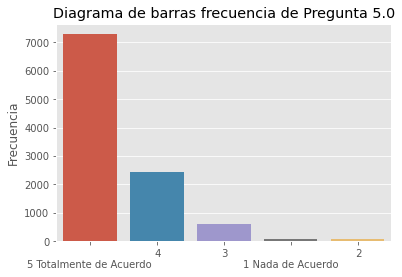

In [ ]:
sns.barplot(data=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad'], x=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad'].index, y=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad']['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad'])
plt.title('Diagrama de barras frecuencia de Pregunta 5.0')
plt.ylabel('Frecuencia')
plt.show()


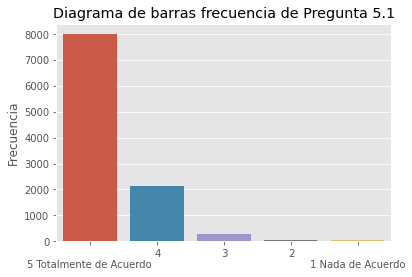

In [ ]:
sns.barplot(data=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes'], x=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes'].index, y=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes']['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes'])
plt.title('Diagrama de barras frecuencia de Pregunta 5.1')
plt.ylabel('Frecuencia')
plt.show()

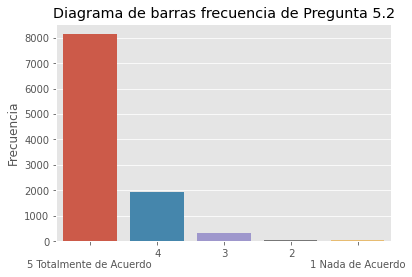

In [ ]:
sns.barplot(data=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos'], x=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos'].index, y=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos']['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos'])
plt.title('Diagrama de barras frecuencia de Pregunta 5.2')
plt.ylabel('Frecuencia')
plt.show()

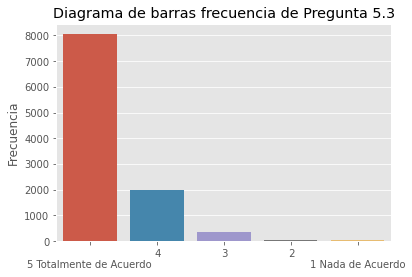

In [ ]:
sns.barplot(data=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia'], x=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia'].index, y=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia']['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia'])
plt.title('Diagrama de barras frecuencia de Pregunta 5.3')
plt.ylabel('Frecuencia')
plt.show()

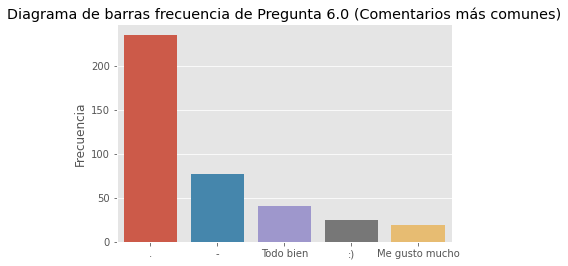

In [ ]:
sns.barplot(data=dic_frecuencia['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:'].head(), x=dic_frecuencia['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:'].head().index, y=dic_frecuencia['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:']['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:'].head())
plt.title('Diagrama de barras frecuencia de Pregunta 6.0 (Comentarios más comunes)')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
sns.barplot(data=dic_frecuencia['6.1 Tu comentario sobre la experiencia es:'], x=dic_frecuencia['6.1 Tu comentario sobre la experiencia es:'].index, y=dic_frecuencia['6.1 Tu comentario sobre la experiencia es:']['6.1 Tu comentario sobre la experiencia es:'])
plt.title('Diagrama de barras frecuencia de Pregunta 6.1')
plt.ylabel('Frecuencia')
plt.show()

NameError: name 'dic_frecuencia' is not defined

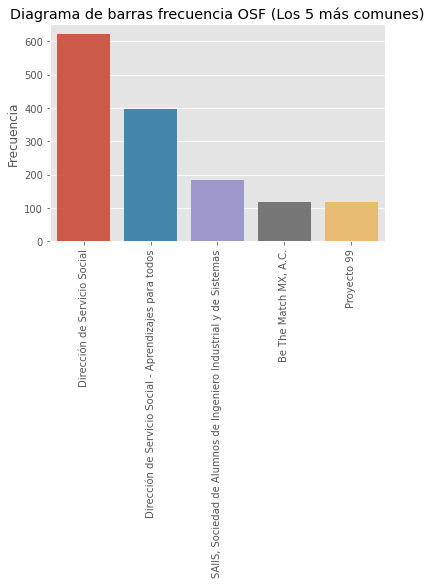

In [ ]:

sns.barplot(data=dic_frecuencia['OSF'].head(), x=dic_frecuencia['OSF'].head().index, y=dic_frecuencia['OSF']['OSF'].head())
plt.title('Diagrama de barras frecuencia OSF (Los 5 más comunes)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

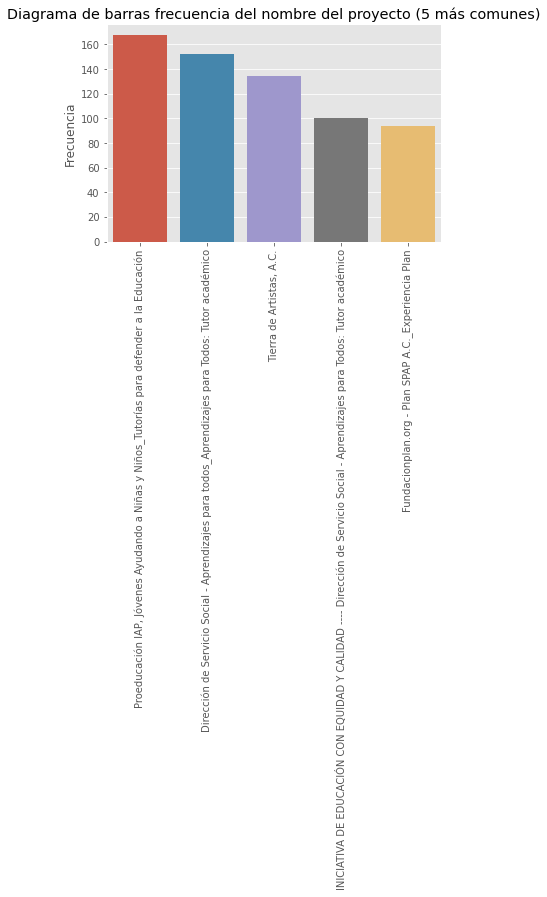

In [ ]:
sns.barplot(data=dic_frecuencia['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:'].head(), x=dic_frecuencia['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:'].head().index, y=dic_frecuencia['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:']['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:'].head())
plt.title('Diagrama de barras frecuencia del nombre del proyecto (5 más comunes)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

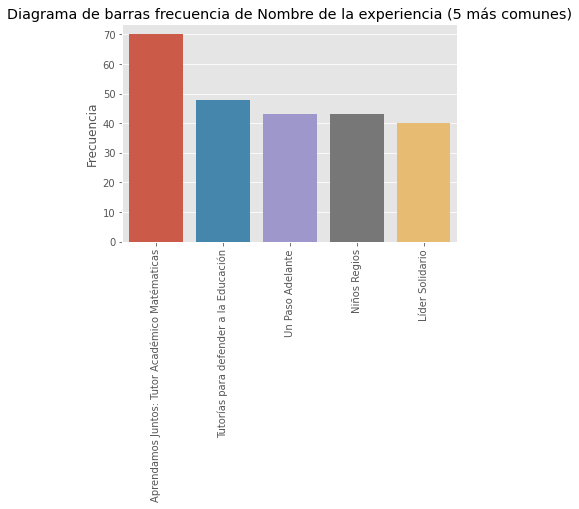

In [ ]:
sns.barplot(data=dic_frecuencia['Nombre de Experiencia'].head(), x=dic_frecuencia['Nombre de Experiencia'].head().index, y=dic_frecuencia['Nombre de Experiencia']['Nombre de Experiencia'].head())
plt.title('Diagrama de barras frecuencia de Nombre de la experiencia (5 más comunes)')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.show()

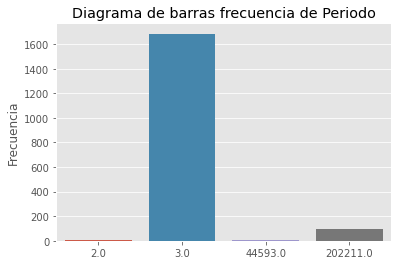

In [ ]:
sns.barplot(data=dic_frecuencia['Periodo'], x=dic_frecuencia['Periodo'].index, y=dic_frecuencia['Periodo']['Periodo'])
plt.title('Diagrama de barras frecuencia de Periodo')
plt.ylabel('Frecuencia')
plt.show()

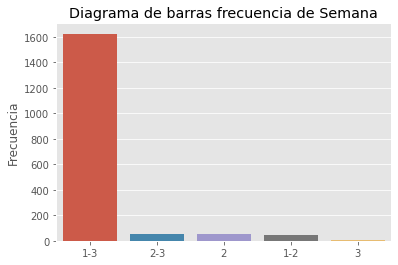

In [ ]:
sns.barplot(data=dic_frecuencia['Semana'], x=dic_frecuencia['Semana'].index, y=dic_frecuencia['Semana']['Semana'])
plt.title('Diagrama de barras frecuencia de Semana')
plt.ylabel('Frecuencia')
plt.show()

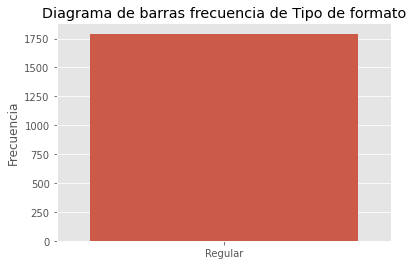

In [ ]:
sns.barplot(data=dic_frecuencia['Tipo de Formato'], x=dic_frecuencia['Tipo de Formato'].index, y=dic_frecuencia['Tipo de Formato']['Tipo de Formato'])
plt.title('Diagrama de barras frecuencia de Tipo de formato')
plt.ylabel('Frecuencia')
plt.show()

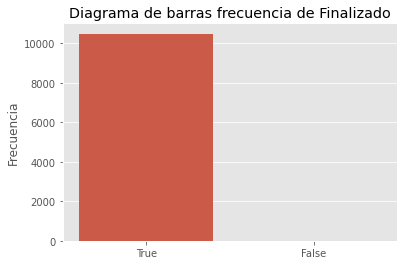

In [ ]:
sns.barplot(data=dic_frecuencia['Finalizado'], x=['True','False'], y =dic_frecuencia['Finalizado']['Finalizado'])
plt.title('Diagrama de barras frecuencia de Finalizado')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Cantidad de filas y columnas ANTES DE HACER LIMPIEZA
raw_data.shape

(10499, 43)

## Preparación de datos (limpieza) - Franco

**1. Seleccion de Conjunto de datos a utilizar**

In [ ]:
# Si más del 50 % de la columna está vacía, se considera borrarla dependiendo de los datos que tenga.
col_inutiles = []
for i in raw_data:
    if raw_data[i].isnull().sum()>=len(raw_data)*0.5:
        col_inutiles.append(i)

# print(col_inutiles)

# Escogemos los índices de las columnas que eliminaremos porque no servirán para el análisis
col_eliminar=[1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 35, 36, 39, 40, 41, 42]
print(raw_data.info())

a=0
for i in col_eliminar:
    col_eliminar[a]=raw_data.columns[i]
    a+=1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 0 to 368
Data columns (total 43 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                            --------------  

In [ ]:
# Eliminación de columnas no necesarias
df = raw_data.copy()
df = df.drop(labels=col_eliminar, axis=1)
df

,Fecha de inicio,Progreso,Duración (en segundos),1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto,"1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f) Herramientas que aplicaste como las actividades, reportes, ""quizzes"", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.",1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora,...,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia",6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:,6.1 Tu comentario sobre la experiencia es:,OSF,CRN,Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:,Nombre de Experiencia
0,2021-04-22 13:24:25,100,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-22 17:35:09,100,207,4,\n5 Muy Satisfecho,4,\n5 Muy Satisfecho,4,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,4,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,26892.0,NaN,NaN
2,2021-04-22 18:31:39,100,168,4,4,4,4,2,4,4,...,4,4,4,4,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN
3,2021-04-23 04:47:59,100,349,4,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN
4,2021-04-23 07:45:14,100,245,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,3,3,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 T

In [ ]:
nombres_nuevos = ["Fecha","Progreso","Duración","P1.1","P1.2","P1.3","P1.4","P1.5","P1.6","P1.7","P1.8","P2","P3","Comentario para OSF","P5.1","P5.2","P5.3","P5.4","Comentario general","Tipo comentario","OSF","CRN", "NomOSF_Experiencia", "Nom_Experiencia"]
df = df.rename(columns = dict(zip(df.columns, nombres_nuevos)))
df = df.drop(labels=0)# Dataframe unido con columnas renombradas
df.shape
df.reset_index(drop=True,inplace=True)

**2. Limpieza de Datos**

In [ ]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)
df.shape

(10494, 24)

In [ ]:
# Corregir valores erróneos
# Transformacion a datos numericos
# Reemplazar valores de 5 y 1 en todas las columnas
for i in df:
    df[i] =df[i].replace({
    "\n5 Totalmente de Acuerdo": 5,
    "\n5 Muy Satisfecho": 5,
    " 4": 4,
    " 3": 3,
    " 2": 2,
    "\n1 Nada Satisfecho": 1,
    "\n1 Nada de Acuerdo": 1
    })
df.head()


,Fecha,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,...,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF,CRN,NomOSF_Experiencia,Nom_Experiencia
0,2021-04-22 17:35:09,100,207,4.0,5.0,4.0,5.0,4.0,5.0,5.0,...,4.0,5.0,5.0,5.0,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,26892.0,NaN,NaN
1,2021-04-22 18:31:39,100,168,4.0,4.0,4.0,4.0,2.0,4.0,4.0,...,4.0,4.0,4.0,4.0,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN
2,2021-04-23 04:47:59,100,349,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN
3,2021-04-23 07:45:14,100,245,5.0,5.0,5.0,3.0,3.0,5.0,5.0,...,5.0,5.0,5.0,5.0,Me gusto mucho la experiencia por la apertura ...,Reconocimiento,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN
4,2021-04-23 08:48:17,100,151,4.0,3.0,3.0,3.0,4.0,5.0,5.0,...,4.0,4.0,4.0,4.0,"No sentí que mi trabajo tuviera impacto, fue m...",Área de oportunidad,Casa Monarca Ayuda Humanitaria al Migrante A.B.P.,26931.0,NaN,NaN


In [ ]:
# Eliminar valores faltantes en columnas ________________

filtered_df = df.dropna(subset=["NomOSF_Experiencia"])
lista = filtered_df["NomOSF_Experiencia"].str.split(" - ")
lista=lista.tolist()
bb = []
for i in range(len(lista)):
    bb.append(lista[i][0])
    i+=1
bb = pd.DataFrame(data = bb)

bb=bb[0].str.split("_")
OSF=[]
for i in range(len(bb)):
    OSF.append(bb[i][0])
    i+=1
filtered_df.reset_index(inplace=True)
OSF = pd.DataFrame(data=OSF,columns=["OSF"])
filtered_df["OSF"] = OSF["OSF"]
filtered_df.index = filtered_df["index"]
filtered_df.drop("index",axis=1,inplace=True)
filtered_df.index.name=None
filtered_df["OSF"]

C:\Users\angel\AppData\Local\Temp/ipykernel_29016/3506867423.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["OSF"] = OSF["OSF"]
C:\Users\angel\AppData\Local\Temp/ipykernel_29016/3506867423.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("index",axis=1,inplace=True)


4435                               Red Recolector SA de CV
4436                               Red Recolector SA de CV
4437     AMMAC, Alianza de Ministerios de Misericordia,...
4438     AMMAC, Alianza de Ministerios de Misericordia,...
4439                          Familia de Santa María, A.C.
                               ...                        
10489                             Tierra de Artistas, A.C.
10490                     Community First (Campus Cumbres)
10491    Secretaría de Educación de Nuevo León: Coordin...
10492                       FUERZA Y ESPERANZA POR UNO MÁS
10493                             Tierra de Artistas, A.C.
Name: OSF, Length: 4236, dtype: object

In [ ]:
df.update(filtered_df)
df.drop(["NomOSF_Experiencia","Nom_Experiencia"],axis=1,inplace=True)
df["OSF"].notnull().sum()

10026

In [ ]:
df["OSF"].fillna("Otros",inplace=True)


In [ ]:
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month 
df.drop(["Fecha","CRN"],axis=1,inplace=True)
temp_cols=df.columns.tolist()
new_cols=temp_cols[-1:] + temp_cols[:-1]
new_cols=new_cols[-1:] + new_cols[:-1]
df=df[new_cols]
df

,Año,Mes,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,...,P2,P3,Comentario para OSF,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF
0,2021,4,100.0,207.0,4.0,5.0,4.0,5.0,4.0,5.0,...,Sí,Sí,Me gustó mucho la causa a la que se estaba apo...,4.0,5.0,5.0,5.0,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP
1,2021,4,100.0,168.0,4.0,4.0,4.0,4.0,2.0,4.0,...,Sí,Sí,"Me gustó el servicio, pero me hubiera gustado ...",4.0,4.0,4.0,4.0,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C."
2,2021,4,100.0,349.0,4.0,5.0,5.0,5.0,5.0,5.0,...,Sí,Sí,Muchas gracias por el apoyo y la oportunidad d...,5.0,5.0,5.0,5.0,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C."
3,2021,4,100.0,245.0,5.0,5.0,5.0,3.0,3.0,5.0,...,Sí,Sí,¡Muchas gracias por la experiencia!,5.0,5.0,5.0,5.0,Me gusto mucho la experiencia por la apertura ...,Reconocimiento,"Programa de Acompañamiento de Servicio Social,..."
4,2021,4,100.0,151.0,4.0,3.0,3.0,3.0,4.0,5.0,...,Sí,Sí,Muchas gracias por todo.,4.0,4.0,4.0,4.0,"No sentí que mi trabajo tuviera impacto, fue m...",Área de oportunidad,Casa Monarca Ayuda Humanitaria al Migrante A.B.P.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10489,2023,5,100.0,380.0,4.0,5.0,5.0,5.0,5.0,5.0,...,Sí,Sí,Muy agradable el señor que nos dio el tutorial...,5.0,5.0,5.0,5.0,Me pareció muy interesante todo el proceso de ...,Reconocimiento,"Tierra de Artistas, A.C."
10490,2023,5,100.0,572.0,4.0,4.0,4.0,4.0,4.0,4.0,...,No,Sí,Sugiero un poco más de comunicación con los pa...,4.0,4.0,4.0,4.0,No he tenido la oportunidad de realizar las ac...,Área de oportunidad,Community First (Campus Cumbres)
10491,2023,5,100.0,305.0,5.0,5.0,5.0,5.0,4.0,5.0,...,Sí,Sí,Muy buen e interesante propósito de la organiz...,4.0,5.0,5.0,5.0,Muy buena experiencia al practicar un poco de ...,Reconocimiento,Secretaría de Educación de Nuevo León: Coordin...
10492,2023,5,100.0,145.0,5.0,5.0,5.0,5.0,5.0,5.0,...,Sí,Sí,Excelente organizacion. Muy buena organizacion...,5.0,5.0,5.0,5.0,Excelente asociacion,Reconocimiento,FUERZA Y ESPERANZA POR UNO MÁS


In [ ]:
#Valores atipicos
#Preguntas
for column in df.loc[:, 'P1.1':'P5.2']:
    df[column].value_counts()

#Demas
for column in df.loc[:, 'Comentario general':]:
    df[column].value_counts()

df.loc[df["Comentario para OSF"].str.len() == 1, "Comentario para OSF"] = ""
df.loc[df["Comentario general"].str.len() == 1, "Comentario general"] = ""
df["Comentario para OSF"].fillna("",inplace=True)
df["Comentario general"].fillna("",inplace=True)
df["Tipo comentario"].fillna("",inplace=True)
df["Comentario general"].value_counts().head()
print(df["Comentario para OSF"].isna().sum())
print(df["Comentario general"].isna().sum())
print(df["Tipo comentario"].isna().sum())
df.drop([419],axis=0,inplace=True)

0
0
0


In [ ]:

#Manejo de datos categoricos
df.loc[df["P2"] == "Sí", "P2"] = 1
df.loc[df["P2"] == "No", "P2"] = 0

df.loc[df["P3"] == "Sí", "P3"] = 1
df.loc[df["P3"] == "No", "P3"] = 0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10493 entries, 0 to 10493
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  10493 non-null  int64  
 1   Mes                  10493 non-null  int64  
 2   Progreso             10493 non-null  float64
 3   Duración             10493 non-null  float64
 4   P1.1                 10493 non-null  float64
 5   P1.2                 10493 non-null  float64
 6   P1.3                 10493 non-null  float64
 7   P1.4                 10493 non-null  float64
 8   P1.5                 10493 non-null  float64
 9   P1.6                 10493 non-null  float64
 10  P1.7                 10493 non-null  float64
 11  P1.8                 10493 non-null  float64
 12  P2                   10493 non-null  object 
 13  P3                   10493 non-null  object 
 14  Comentario para OSF  10493 non-null  object 
 15  P5.1                 10493 non-null 

In [ ]:
# Podemos eliminar o interpolar estas columnas

no_terminados=df[df["Progreso"]<100]
no_terminados

,Año,Mes,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,...,P2,P3,Comentario para OSF,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF
1999,2021,7,88.0,58.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,1,Muy amables,5.0,5.0,5.0,5.0,,,Fundacionplan.org | Plan SPAP A.C.
3250,2021,11,88.0,6989.0,4.0,4.0,5.0,5.0,5.0,4.0,...,1,1,mejorar el filtro de selección de alumnos bene...,5.0,5.0,5.0,5.0,El propósito es noble y me gusta formar parte ...,,Dirección de Servicio Social - Aprendizajes pa...
4433,2021,12,88.0,179.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1,1,El CVA me parece algo muy interesante y que ap...,4.0,4.0,4.0,4.0,Me gusto mucho ser parte de este proyecto soli...,,Centro Virtual de Aprendizaje Tec de Monterrey
9687,2022,6,88.0,68.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1,1,Ninguno,4.0,4.0,4.0,4.0,Me gustó la actitud de los muchachos,,Dirección de Servicio Social - Aprendizajes pa...


## Exploración de datos limpios

In [ ]:
# Cantidad de filas y columnas DESPUÉS DE HACER LIMPIEZA
df.shape

(10493, 22)

In [ ]:
# Columnas del dataframe
df.columns

Index(['Año', 'Mes', 'Progreso', 'Duración', 'P1.1', 'P1.2', 'P1.3', 'P1.4',
       'P1.5', 'P1.6', 'P1.7', 'P1.8', 'P2', 'P3', 'Comentario para OSF',
       'P5.1', 'P5.2', 'P5.3', 'P5.4', 'Comentario general', 'Tipo comentario',
       'OSF'],
      dtype='object')

In [ ]:
df.describe().drop(columns=["Año", "Mes", "Progreso", "Duración"])

,Año,Mes,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4
count,10493.000000,10493.000000,10493.000000,1.049300e+04,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000
mean,2021.722196,7.988754,99.995426,8.587437e+03,4.532831,4.588488,4.561422,4.488897,4.304775,4.492328,4.473935,4.460974,4.599638,4.717907,4.723911,4.712761
std,0.700008,3.307224,0.234261,5.216296e+04,0.738486,0.694533,0.719511,0.834810,0.945490,0.841104,0.866857,0.839893,0.701904,0.564130,0.576511,0.588220
min,2021.000000,1.000000,88.000000,2.500000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.000000,6.000000,100.000000,1.190000e+02,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000
50%,2022.000000,7.000000,100.000000,1.900000e+02,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,2022.000000,11.000000,100.000000,3.620000e+02,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2023.000000,12.000000,100.000000,1.298823e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.dtypes

Año                      int64
Mes                      int64
Progreso               float64
Duración               float64
P1.1                   float64
P1.2                   float64
P1.3                   float64
P1.4                   float64
P1.5                   float64
P1.6                   float64
P1.7                   float64
P1.8                   float64
P2                      object
P3                      object
Comentario para OSF     object
P5.1                   float64
P5.2                   float64
P5.3                   float64
P5.4                   float64
Comentario general      object
Tipo comentario         object
OSF                     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10493 entries, 0 to 10493
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  10493 non-null  int64  
 1   Mes                  10493 non-null  int64  
 2   Progreso             10493 non-null  float64
 3   Duración             10493 non-null  float64
 4   P1.1                 10493 non-null  float64
 5   P1.2                 10493 non-null  float64
 6   P1.3                 10493 non-null  float64
 7   P1.4                 10493 non-null  float64
 8   P1.5                 10493 non-null  float64
 9   P1.6                 10493 non-null  float64
 10  P1.7                 10493 non-null  float64
 11  P1.8                 10493 non-null  float64
 12  P2                   10493 non-null  object 
 13  P3                   10493 non-null  object 
 14  Comentario para OSF  10493 non-null  object 
 15  P5.1                 10493 non-null 

In [ ]:
# Separamos los datasets dependiendo si dejaron un comentario o no

df_comentarios = df[(df["Comentario para OSF"].notna()) | (df["Comentario general"].notna())]
df_sincomentarios = df[(df["Comentario para OSF"].isna()) & (df["Comentario general"].isna())]

In [ ]:
print(df_comentarios.shape)
print(df_sincomentarios.shape)

(10493, 22)
(0, 22)


In [ ]:
para_OSF = list(df_comentarios[df_comentarios["Comentario para OSF"].notna()]["Comentario para OSF"])
general = list(df_comentarios[df_comentarios["Comentario general"].notna()]["Comentario general"])

print(len(para_OSF))
print(len(general))

10493
10493


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10493 entries, 0 to 10493
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  10493 non-null  int64  
 1   Mes                  10493 non-null  int64  
 2   Progreso             10493 non-null  float64
 3   Duración             10493 non-null  float64
 4   P1.1                 10493 non-null  float64
 5   P1.2                 10493 non-null  float64
 6   P1.3                 10493 non-null  float64
 7   P1.4                 10493 non-null  float64
 8   P1.5                 10493 non-null  float64
 9   P1.6                 10493 non-null  float64
 10  P1.7                 10493 non-null  float64
 11  P1.8                 10493 non-null  float64
 12  P2                   10493 non-null  object 
 13  P3                   10493 non-null  object 
 14  Comentario para OSF  10493 non-null  object 
 15  P5.1                 10493 non-null 

In [ ]:
df.reset_index(drop=True,inplace=True)
df.to_excel("Enjoyers.xlsx")

## NLP

In [ ]:
# Librerías para NLP
# nltk.download()   # Instalen todo
# Importar
import nltk
from nltk.corpus import cess_esp
import nltk.tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import es_core_news_sm
nlp = es_core_news_sm.load()


ModuleNotFoundError: No module named 'nltk'

In [ ]:
# Lista de palabras que omitir
stopwords = stopwords.words('spanish') + ["así", "proyecto", "organización", "servicio"]

### NLP con los comentarios para la OSF

In [ ]:
# Pasar de lista a string
para_OSF_s = ""
for i in para_OSF:
    para_OSF_s = para_OSF_s + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(para_OSF_s)
tokenized_words = [i.lower() for i in tokenized if i.isalpha()]

no_stopwords = [i for i in tokenized_words if i not in stopwords]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

In [ ]:
counter = Counter(lemmatized)
contador = pd.DataFrame(dict(counter), index=[0]).transpose().reset_index().rename(columns={"index":"Palabra",0:"Repetición"}).sort_values("Repetición", ascending = False).reset_index(drop=True)
contador.head()

,Palabra,Repetición
0,buena,931
1,causa,848
2,experiencia,827
3,gusto,804
4,social,792


In [ ]:
lemmatized_string = ""
for i in lemmatized:
    lemmatized_string += i+" "

In [ ]:
doc = nlp(lemmatized_string)

In [ ]:
tagged_adj = [(w.text, w.pos_) for w in doc if w.pos_!="NOUN"]
print(tagged_adj)
contador_adj = pd.DataFrame(dict(Counter(tagged_adj)), index=[0]).transpose().reset_index().rename(columns={"level_0":"Palabra", "level_1":"Tipo", 0:"Cantidad"}).sort_values("Cantidad", ascending=False).reset_index(drop=True)
contador_adj

[('gustó', 'VERB'), ('apoyando', 'VERB'), ('formadora', 'ADJ'), ('gustó', 'VERB'), ('gustado', 'ADJ'), ('poder', 'AUX'), ('adentrarme', 'VERB'), ('conocer', 'VERB'), ('muchas', 'DET'), ('participar', 'VERB'), ('hacen', 'VERB'), ('muchas', 'DET'), ('noble', 'ADJ'), ('fáciles', 'ADJ'), ('empatizar', 'VERB'), ('seguir', 'VERB'), ('aprendí', 'ADJ'), ('ma', 'PROPN'), ('trata', 'VERB'), ('social', 'ADJ'), ('agradecido', 'ADJ'), ('adquirido', 'ADJ'), ('siento', 'ADJ'), ('vuelto', 'ADJ'), ('sensible', 'ADJ'), ('hacer', 'VERB'), ('valoro', 'ADJ'), ('debido', 'ADJ'), ('trata', 'VERB'), ('suma', 'VERB'), ('sociedad', 'ADJ'), ('ahora', 'ADV'), ('debido', 'ADJ'), ('buscan', 'VERB'), ('seguir', 'VERB'), ('sociales', 'ADJ'), ('tener', 'VERB'), ('consideración', 'ADJ'), ('corporal', 'ADJ'), ('excelente', 'ADJ'), ('trabajo', 'ADJ'), ('encantó', 'VERB'), ('satisfactorio', 'ADJ'), ('poder', 'AUX'), ('participar', 'VERB'), ('ser', 'AUX'), ('increíble', 'ADJ'), ('hacen', 'VERB'), ('realmente', 'ADV'), ('im

,Palabra,Tipo,Cantidad
0,buena,ADJ,929
1,bien,ADV,778
2,social,ADJ,723
3,interesante,ADJ,673
4,excelente,ADJ,647
...,...,...,...
8011,aprox,VERB,1
8012,empezó,VERB,1
8013,relevante,ADV,1
8014,complejos,ADJ,1


### NLP con los comentarios generales (para el TEC)

In [ ]:
# Pasar de lista a string
general_s = ""
for i in general:
    general_s = general_s + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(general_s)
tokenized_words = [i.lower() for i in tokenized if i.isalpha()]

no_stopwords = [i for i in tokenized_words if i not in stopwords]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

In [ ]:
counter = Counter(lemmatized)
contador = pd.DataFrame(dict(counter), index=[0]).transpose().reset_index().rename(columns={"index":"Palabra",0:"Repetición"}).sort_values("Repetición", ascending = False).reset_index(drop=True)
contador.head()

,Palabra,Repetición
0,experiencia,1746
1,gusto,1136
2,poder,1064
3,persona,976
4,gustó,955


In [ ]:
lemmatized_string = ""
for i in lemmatized:
    lemmatized_string += i+" "


In [ ]:
doc = nlp(lemmatized_string)

In [ ]:
tagged_adj = [(w.text, w.pos_) for w in doc if w.pos_!="NOUN"]
print(tagged_adj)
contador_adj = pd.DataFrame(dict(Counter(tagged_adj)), index=[0]).transpose().reset_index().rename(columns={"level_0":"Palabra", "level_1":"Tipo", 0:"Cantidad"}).sort_values("Cantidad", ascending=False).reset_index(drop=True)
contador_adj

[('complicado', 'ADJ'), ('conseguir', 'VERB'), ('tiempos', 'PROPN'), ('pandemia', 'VERB'), ('enseñó', 'VERB'), ('ayudó', 'VERB'), ('mejorar', 'VERB'), ('comunicarme', 'ADJ'), ('trabajar', 'VERB'), ('pues', 'SCONJ'), ('ojalá', 'INTJ'), ('ahora', 'ADV'), ('valgan', 'VERB'), ('pasado', 'ADJ'), ('hice', 'VERB'), ('mísera', 'ADJ'), ('dieron', 'VERB'), ('caen', 'VERB'), ('mal', 'ADV'), ('único', 'ADJ'), ('falta', 'VERB'), ('compañeros', 'ADJ'), ('pocas', 'DET'), ('asistían', 'VERB'), ('socio', 'ADJ'), ('formador', 'ADJ'), ('participaban', 'VERB'), ('reto', 'ADJ'), ('cumplían', 'VERB'), ('trabajo', 'VERB'), ('entristeció', 'VERB'), ('ver', 'VERB'), ('empatía', 'VERB'), ('trabajar', 'VERB'), ('social', 'ADJ'), ('creo', 'VERB'), ('verdaderamente', 'ADV'), ('debe', 'AUX'), ('hacer', 'VERB'), ('apertura', 'VERB'), ('sf', 'ADP'), ('intercambiar', 'VERB'), ('involucrar', 'VERB'), ('sincrónicas', 'ADJ'), ('sentí', 'VERB'), ('poquito', 'PROPN'), ('hice', 'VERB'), ('necesita', 'VERB'), ('ayuda', 'ADJ'

,Palabra,Tipo,Cantidad
0,poder,AUX,998
1,gustó,VERB,952
2,social,ADJ,869
3,buena,ADJ,674
4,interesante,ADJ,608
...,...,...,...
8914,esforzándote,ADJ,1
8915,intervenir,VERB,1
8916,residir,VERB,1
8917,dotamos,VERB,1
